In [20]:
import langchain
langchain.__version__

'1.2.0'

In [1]:
from langchain.agents import create_agent

In [ ]:
from pydantic import BaseModel
from langchain.agents import create_agent
from langchain.agents.structured_output import ToolStrategy


class ContactInfo(BaseModel):
    name: str
    email: str
    phone: str

agent = create_agent(
    model="gpt-4o-mini",
    # tools=[search_tool],
    response_format=ToolStrategy(ContactInfo)
)

result = agent.invoke({
    "messages": [{"role": "user", "content": "Extract contact info from: John Doe, john@example.com, (555) 123-4567"}]
})

result["structured_response"]

ContactInfo(name='John Doe', email='john@example.com', phone='(555) 123-4567')

In [ ]:
os.environ["OPENAI_API_KEY"] = "YOUR-API-KEY"

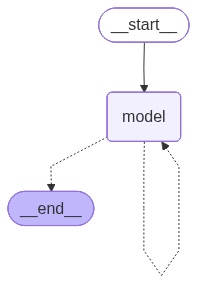

In [10]:
agent

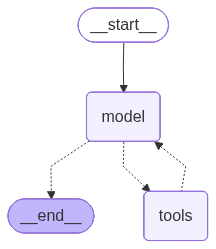

In [15]:

def get_weather(city:str) -> str:
    """
    This function returns the weather in a given city.
    """
    return f"The weather in {city} is sunny."


agent = create_agent(model="gpt-4o-mini", 
tools=[get_weather], 
system_prompt="you are a helpful assistant")

agent


In [18]:
responses = agent.invoke({"messages": [{"role": "user", "content": "What is the weather like in New York?"}]})

In [19]:
responses["messages"][-1]

AIMessage(content='The weather in New York is sunny.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 93, 'total_tokens': 102, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_c4585b5b9c', 'id': 'chatcmpl-CqCCz82z3772pa0924U599EayukWq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b4ef1-a593-7ac3-a479-2b99546cc021-0', usage_metadata={'input_tokens': 93, 'output_tokens': 9, 'total_tokens': 102, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})